#Medical Cost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
df = pd.read_csv('Medical cost.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df[['sex', 'children']].groupby(df['sex']).agg(['mean', 'count'])

children      
            mean count
sex                   
female  1.074018   662
male    1.115385   676

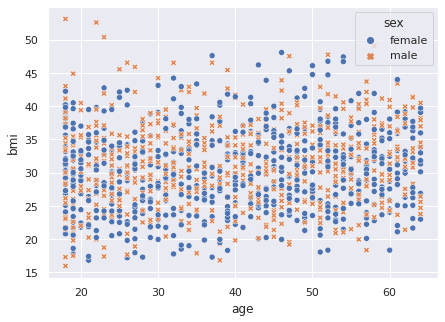

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,
            x='age',
            y='bmi',
            hue='sex',
            style='sex')

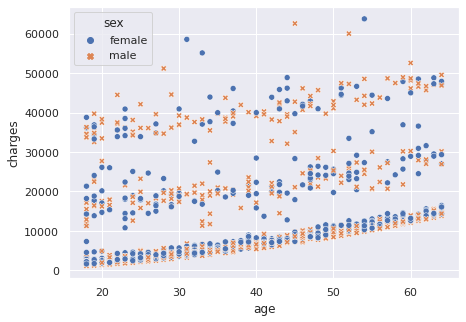

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,
            x='age',
            y='charges',
            hue='sex',
            style='sex')

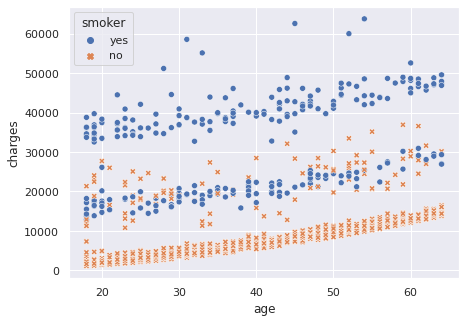

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df,
            x='age',
            y='charges',
            hue='smoker',
            style='smoker')

## Removing the bmi outlier

> not necessary

In [ ]:
df = df[df['bmi'] < 50] 

## Dealing with Categorical Features

In [ ]:
df['region'].value_counts()

southeast    361
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
df['sex'].value_counts()

male      673
female    662
Name: sex, dtype: int64

In [ ]:
df['smoker'].value_counts()

no     1062
yes     273
Name: smoker, dtype: int64

### Converting

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cat = ['region', 'sex', 'smoker']

for i in cat:
  df[i] = le.fit_transform(df[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


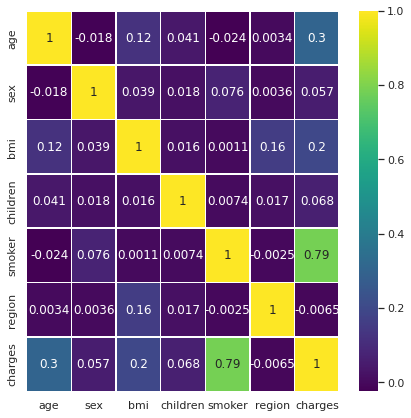

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),
            annot=True,
            cmap='viridis',
            linewidths=0.5)

In [ ]:
y = df['charges']
X = df.drop(['charges'],
            axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor().fit(X_train, y_train)

In [ ]:
print(round(rf.score(X_test, y_test)*100,2), '%')

86.27 %


In [ ]:
import pickle

saved_model = pickle.dump(rf, open('MedicalCost_rf.pkl', 'wb'))